In [25]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
#Loading dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [27]:
#Previewing the dataset
print(X.head())
print(y[:5])

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
[151.  75. 141. 206. 135.]


In [28]:
#Normalizaton Check
print("Data is normalized: Mean =", round(X.mean()[0], 3), "| Std Dev =", round(X.std()[0], 3))

Data is normalized: Mean = -0.0 | Std Dev = 0.048


<ipython-input-28-665d07a3b911>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Data is normalized: Mean =", round(X.mean()[0], 3), "| Std Dev =", round(X.std()[0], 3))


In [29]:
#Feature engineering- interactive terms
X['bmi_bp'] = X['bmi'] * X['bp']
X['bmi_glucose'] = X['bmi'] * X['s5']  # s5 is a proxy for glucose
X['age_glucose'] = X['age'] * X['s5']

In [30]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Models put to keys
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

In [38]:
#Fit models and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'model': model,
        'MAE': mean_absolute_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }

In [39]:
#Show Results
print("📊 Model Comparison")
for name, res in results.items():
    print(f"{name}: MAE = {res['MAE']:.2f}, R² = {res['R²']:.2f}")

📊 Model Comparison
Linear: MAE = 41.10, R² = 0.49
Ridge: MAE = 46.13, R² = 0.42
Lasso: MAE = 42.85, R² = 0.47


In [40]:
best_model = results['Lasso']['model']
coeffs = pd.Series(best_model.coef_, index=X.columns).sort_values(key=abs, ascending=False)

print("\n Top Feature Coefficients (Lasso):")
print(coeffs.head(5))


 Top Feature Coefficients (Lasso):
bmi    552.697775
s5     447.919525
bp     303.365158
s3    -229.255776
sex   -152.664779
dtype: float64


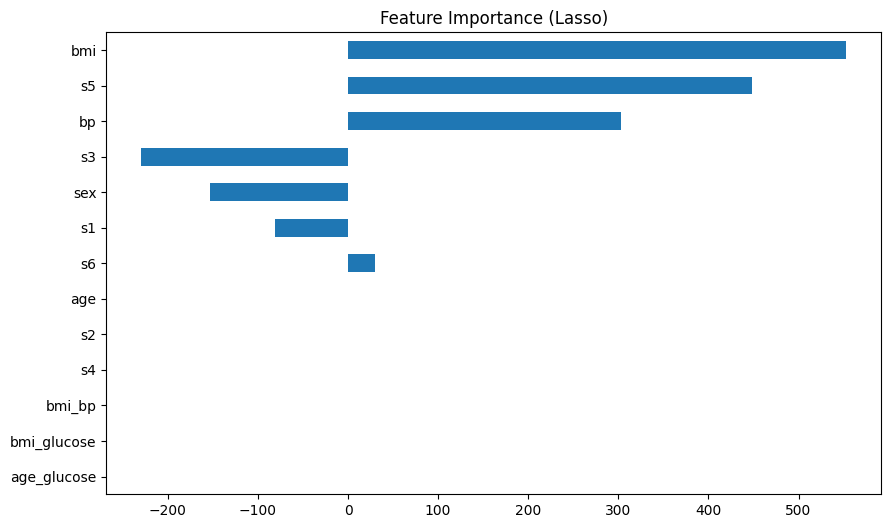

In [42]:
#plot coefficients
coeffs.plot(kind='barh', figsize=(10, 6), title='Feature Importance (Lasso)')
plt.gca().invert_yaxis()
plt.show()

In [44]:
#Actionable Insights
print("Actionable Insights:")
top_features = coeffs.head(3).index.tolist()
print(f"Top 3 high-risk factors: {', '.join(top_features)}")
print("→ Suggest prioritizing these in screenings and early interventions.")

Actionable Insights:
Top 3 high-risk factors: bmi, s5, bp
→ Suggest prioritizing these in screenings and early interventions.


In [45]:
import pickle

with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)